In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [33]:
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [186]:
import folium
from sklearn import preprocessing

In [194]:
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier #seleccion del algoritmo
from sklearn import metrics #metricas de evaluacion

In [9]:
file = "carpetas-de-investigacion-pgj-cdmx.csv"

df = pd.read_csv(file, delimiter=';')

df.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
0,2016.0,Enero,2016-01-05 19:15:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-1CD,CHINAMPAC DE JUÁREZ,IZTAPALAPA,2016-01-06 01:43:10,Enero,2016,CALZ. IGNACIO ZARAGOZA,AZACRRAGA VIDAURRETA (SIN REGISTRO DEL SAP),-99.039792,19.387093,"19.3870929998, -99.039792"
1,2015.0,Enero,2015-01-06 00:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-4,UI-2SD,CENTRO DE AZCAPOTZALCO,AZCAPOTZALCO,2016-01-06 10:02:32,Enero,2016,AVENIDA 22 DE FEBRERO,***DATOS 74***,-99.182947,19.483439,"19.4834389998, -99.182947"
2,2016.0,Enero,2016-01-06 08:30:00,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-4,UI-2CD,TEPEYAC INSURGENTES,GUSTAVO A MADERO,2016-01-06 09:28:42,Enero,2016,AVENIDA MONTEVIDEO,INSURGENTES NORTE,-99.123658,19.487130,"19.4871299998, -99.123658"
3,2016.0,Enero,2016-01-05 21:50:00,QUEBRANTAMIENTO DE SELLOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN DELITOS AMBIENTALES Y EN MATE...,DA-1,UI-1SD,NARVARTE,BENITO JUAREZ,2016-01-06 01:26:40,Enero,2016,CALLE J. ENRIQUE PESTALOZZI,NaN,-99.159572,19.386404,"19.3864039998, -99.159572"
4,2016.0,Enero,2016-01-06 07:05:00,ROBO DE ACCESORIOS DE AUTO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTACALCO,IZC-1,UI-2SD,VIADUCTO PIEDAD,IZTACALCO,2016-01-06 10:18:35,Enero,2016,NICETO DE ZAMACOIS FRENTE AL NUMERO 95,SANTA ANITA,-99.136206,19.399977,"19.3999769998, -99.136206"


In [10]:
df.tail()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
788292,2019.0,Mayo,2019-05-24 03:25:00,ROBO DE VEHICULO DE SERVICIO DE TRANSPORTE SIN...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN CUAUHTEMOC,CUH-8,UI-3SD,AMPLIACIÓN ASTURIAS,CUAUHTEMOC,2019-05-25 07:12:37,Mayo,2019,GUMERSINDO ESQUER,NaN,-99.130438,19.406547,"19.4065468982, -99.1304380004"
788293,2019.0,Mayo,2019-05-25 08:15:00,AMENAZAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-4,UI-1SD,LOMAS DE CHAPULTEPEC IV SECCIÓN (LOMAS VIRREYES),MIGUEL HIDALGO,2019-05-25 09:14:11,Mayo,2019,JUAN DE ACUÑA,NaN,-99.208792,19.417792,"19.4177916027, -99.2087919999"
788294,2019.0,Mayo,2019-05-25 07:20:00,DAÑO EN PROPIEDAD AJENA INTENCIONAL A VIAS DE ...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN VENUSTIANO CARRANZA,VC-3,UI-1CD,ROMERO RUBIO,VENUSTIANO CARRANZA,2019-05-25 09:19:37,Mayo,2019,AVENIDA OCEANIA,NaN,-99.094403,19.440942,"19.440942304, -99.0944026002"
788295,2019.0,Marzo,2019-03-05 14:56:00,ROBO A NEGOCIO CON VIOLENCIA,ROBO A NEGOCIO CON VIOLENCIA,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-3,UI-1SD,LINDAVISTA,GUSTAVO A MADERO,2019-05-25 09:28:39,Mayo,2019,AV. INSTITUTO POLITECNICO NACIONAL,NaN,-99.133173,19.492031,"19.492031097, -99.1331734003"
788296,2019.0,Mayo,2019-05-22 10:30:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN COYOACÁN,COY-5,UI-1CD,EX-EJIDO DE SAN PABLO TEPETLAPA,COYOACAN,2019-05-25 09:45:18,Mayo,2019,HEROICA ESCUELA NAVAL MILITAR,CALZADA DE LA VIRGENE ESQUINA CANAL DE MIRAMONTES,-99.119735,19.319553,"19.3195530993, -99.1197345263"


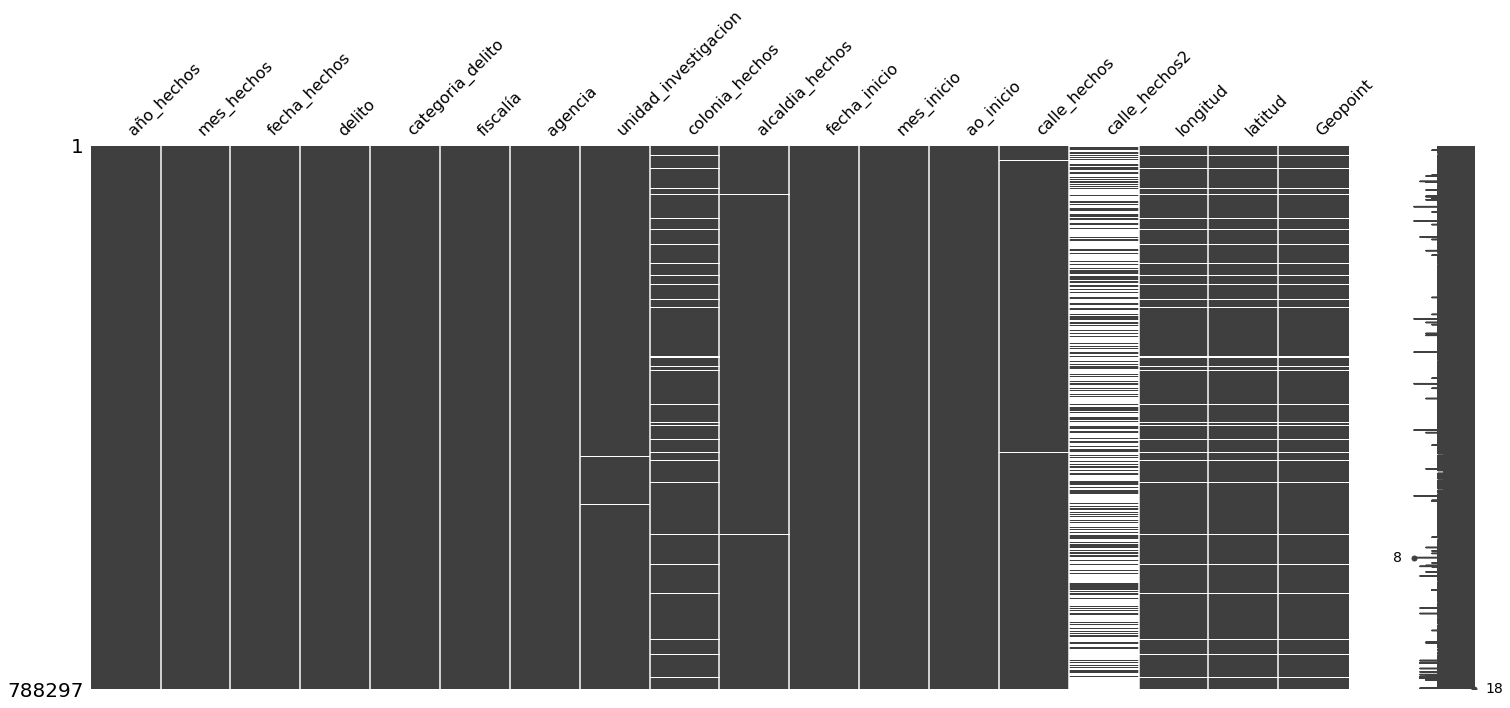

In [11]:
msno.matrix(df) #.sample(350000)

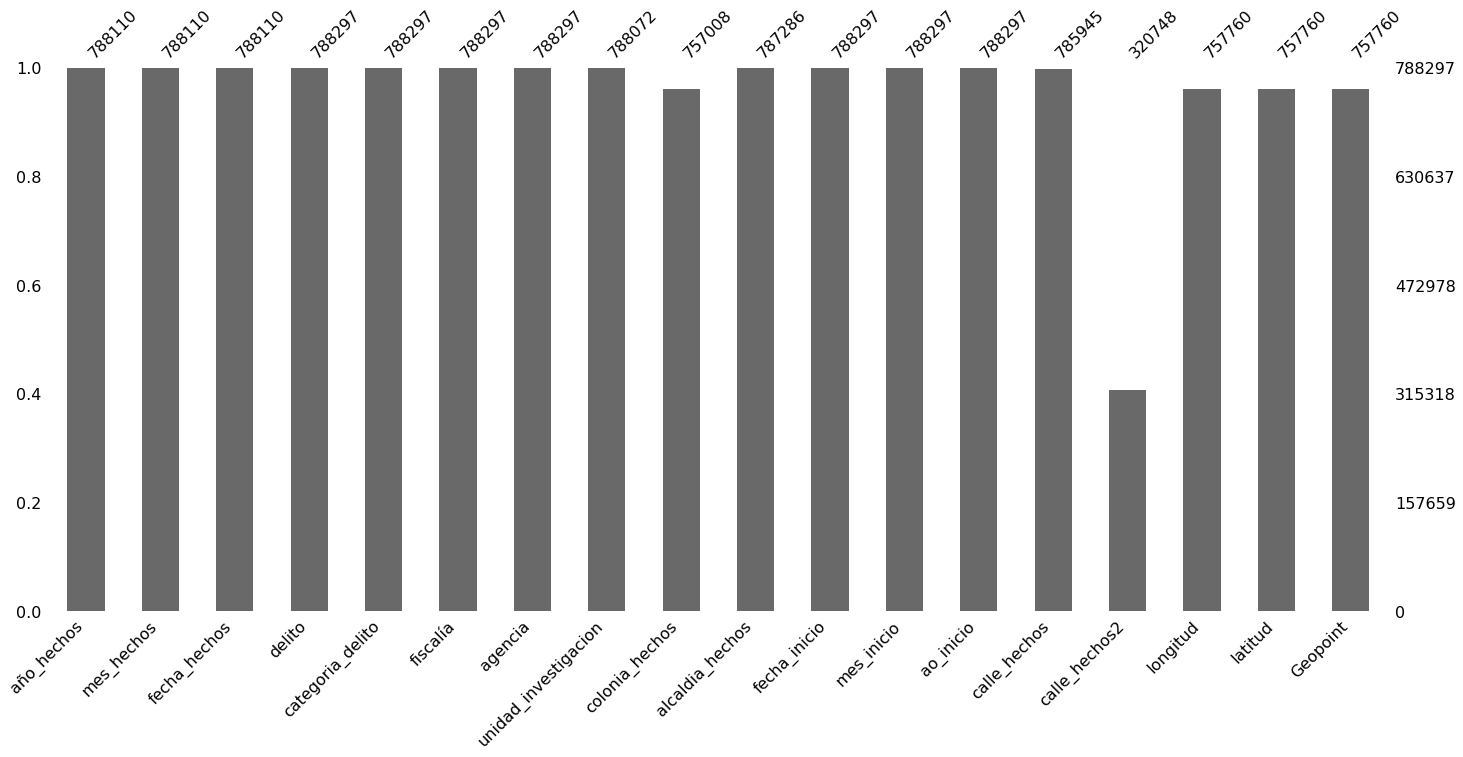

In [12]:
msno.bar(df)

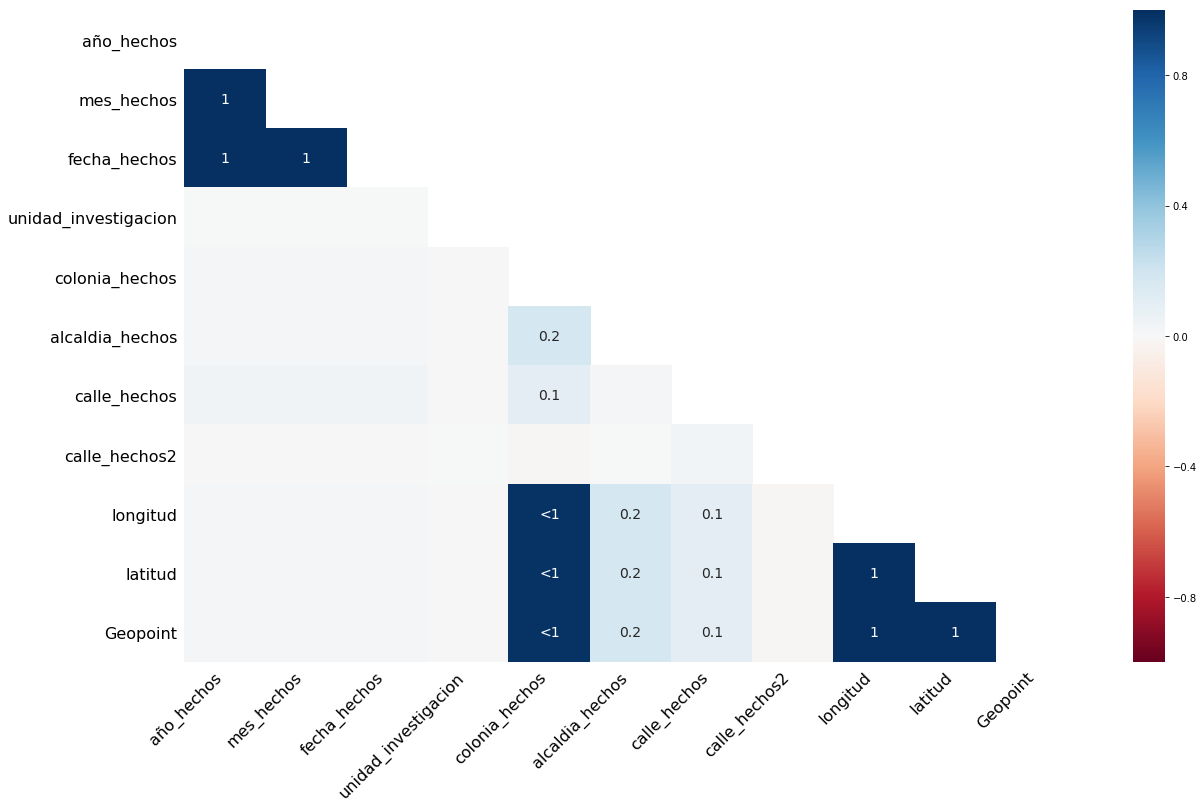

In [13]:
msno.heatmap(df)

In [14]:
df.drop(['calle_hechos2'], axis='columns', inplace=True)

In [15]:
df.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,longitud,latitud,Geopoint
0,2016.0,Enero,2016-01-05 19:15:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-1CD,CHINAMPAC DE JUÁREZ,IZTAPALAPA,2016-01-06 01:43:10,Enero,2016,CALZ. IGNACIO ZARAGOZA,-99.039792,19.387093,"19.3870929998, -99.039792"
1,2015.0,Enero,2015-01-06 00:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-4,UI-2SD,CENTRO DE AZCAPOTZALCO,AZCAPOTZALCO,2016-01-06 10:02:32,Enero,2016,AVENIDA 22 DE FEBRERO,-99.182947,19.483439,"19.4834389998, -99.182947"
2,2016.0,Enero,2016-01-06 08:30:00,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-4,UI-2CD,TEPEYAC INSURGENTES,GUSTAVO A MADERO,2016-01-06 09:28:42,Enero,2016,AVENIDA MONTEVIDEO,-99.123658,19.487130,"19.4871299998, -99.123658"
3,2016.0,Enero,2016-01-05 21:50:00,QUEBRANTAMIENTO DE SELLOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN DELITOS AMBIENTALES Y EN MATE...,DA-1,UI-1SD,NARVARTE,BENITO JUAREZ,2016-01-06 01:26:40,Enero,2016,CALLE J. ENRIQUE PESTALOZZI,-99.159572,19.386404,"19.3864039998, -99.159572"
4,2016.0,Enero,2016-01-06 07:05:00,ROBO DE ACCESORIOS DE AUTO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTACALCO,IZC-1,UI-2SD,VIADUCTO PIEDAD,IZTACALCO,2016-01-06 10:18:35,Enero,2016,NICETO DE ZAMACOIS FRENTE AL NUMERO 95,-99.136206,19.399977,"19.3999769998, -99.136206"


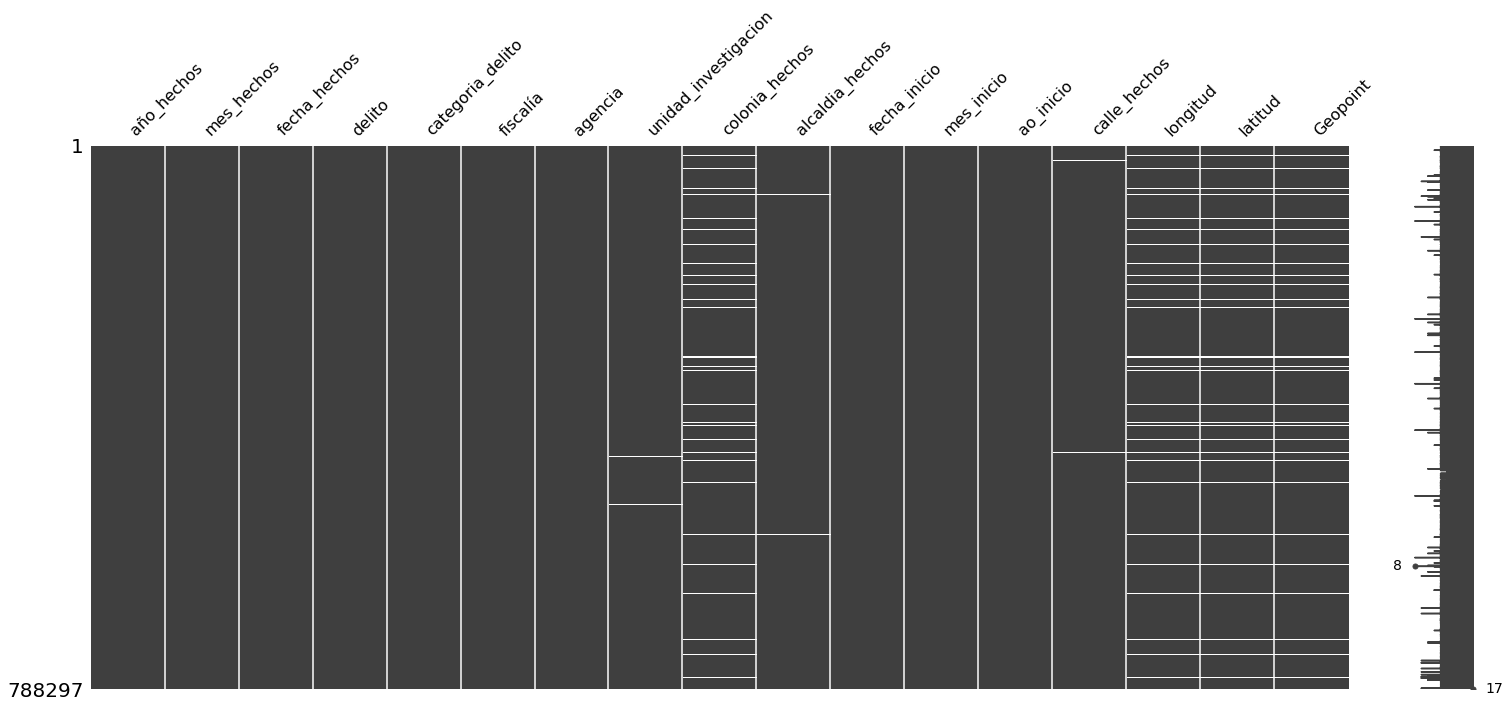

In [16]:
msno.matrix(df) #.sample(350000)

In [64]:
df2 = df[['año_hechos', 'mes_hechos', 'fecha_hechos', 'delito',
       'categoria_delito', 'alcaldia_hechos', 'longitud', 'latitud',
       'Geopoint']]

In [65]:
df2.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,alcaldia_hechos,longitud,latitud,Geopoint
0,2016.0,Enero,2016-01-05 19:15:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,IZTAPALAPA,-99.039792,19.387093,"19.3870929998, -99.039792"
1,2015.0,Enero,2015-01-06 00:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,AZCAPOTZALCO,-99.182947,19.483439,"19.4834389998, -99.182947"
2,2016.0,Enero,2016-01-06 08:30:00,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,GUSTAVO A MADERO,-99.123658,19.487130,"19.4871299998, -99.123658"
3,2016.0,Enero,2016-01-05 21:50:00,QUEBRANTAMIENTO DE SELLOS,DELITO DE BAJO IMPACTO,BENITO JUAREZ,-99.159572,19.386404,"19.3864039998, -99.159572"
4,2016.0,Enero,2016-01-06 07:05:00,ROBO DE ACCESORIOS DE AUTO,DELITO DE BAJO IMPACTO,IZTACALCO,-99.136206,19.399977,"19.3999769998, -99.136206"


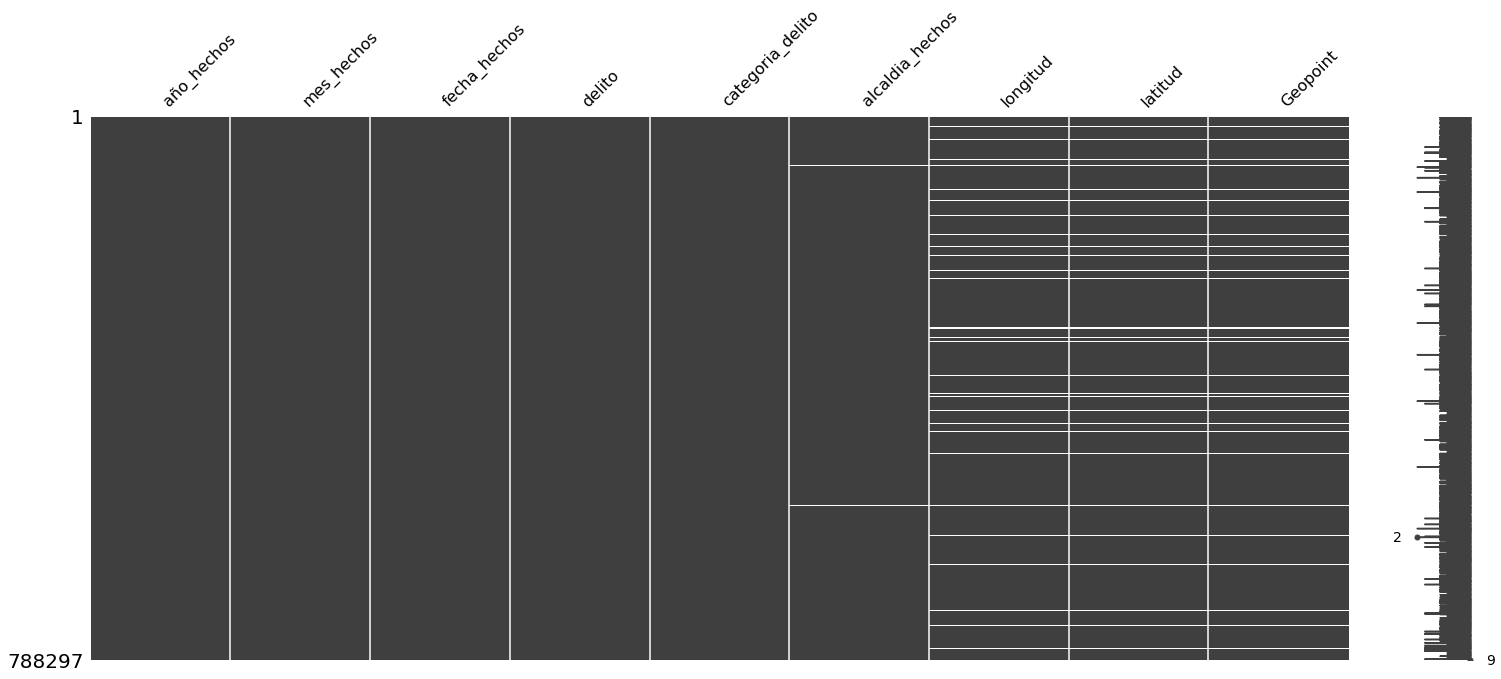

In [66]:
msno.matrix(df2) #.sample(350000)

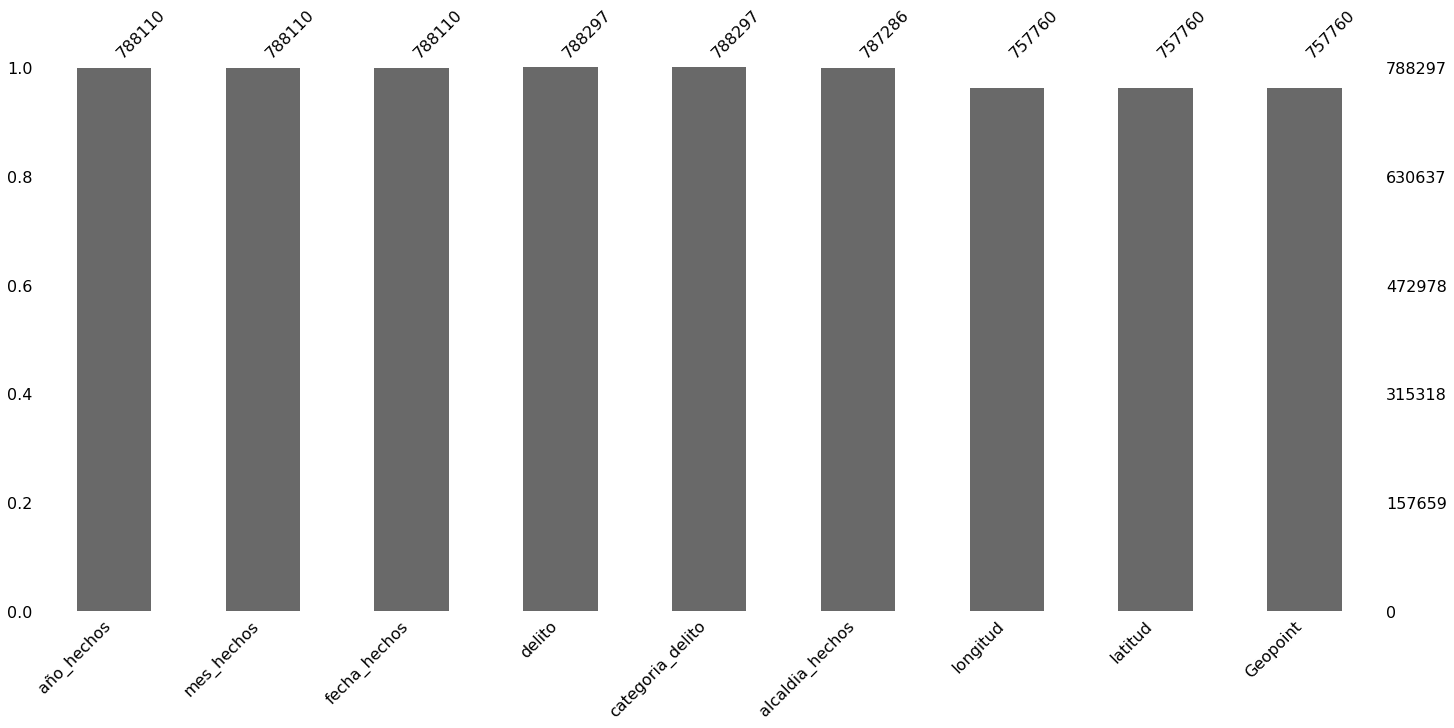

In [67]:
msno.bar(df2)

In [68]:
df2 = df2.dropna()

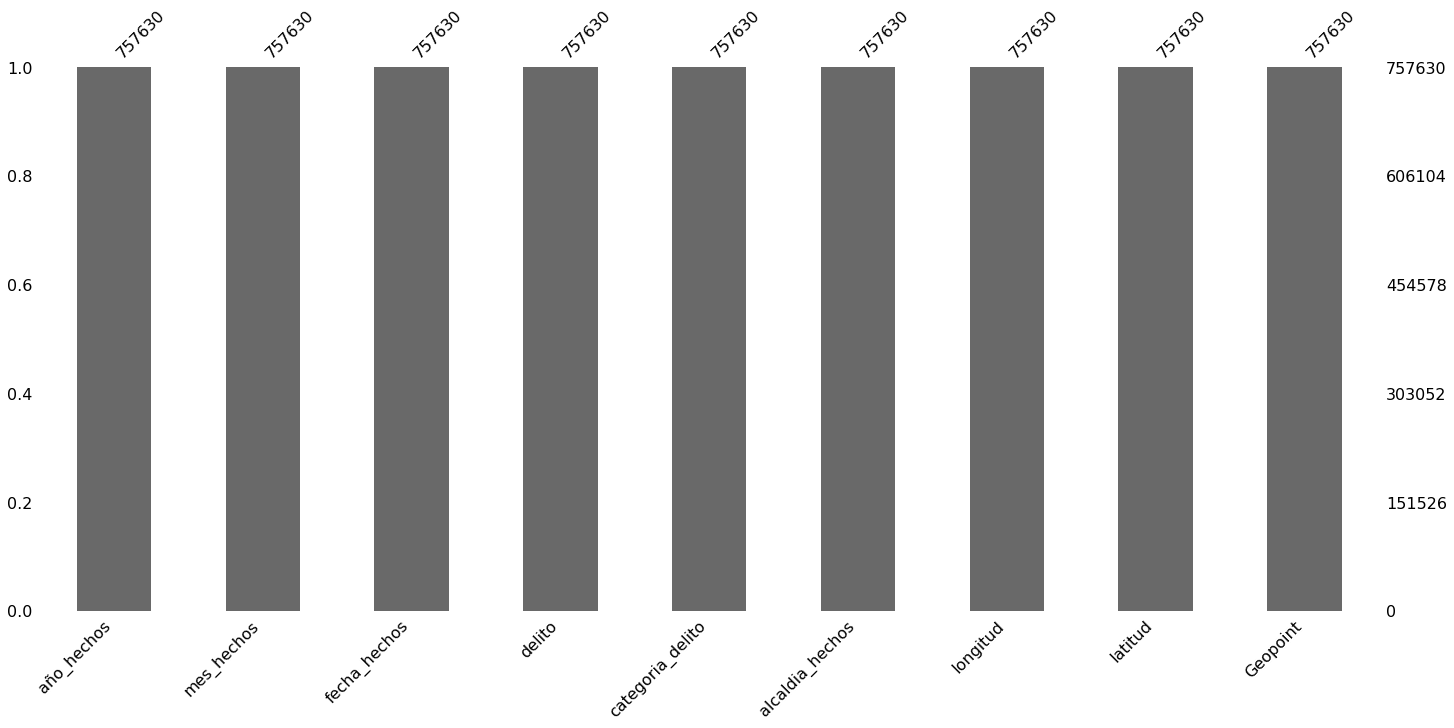

In [69]:
msno.bar(df2)

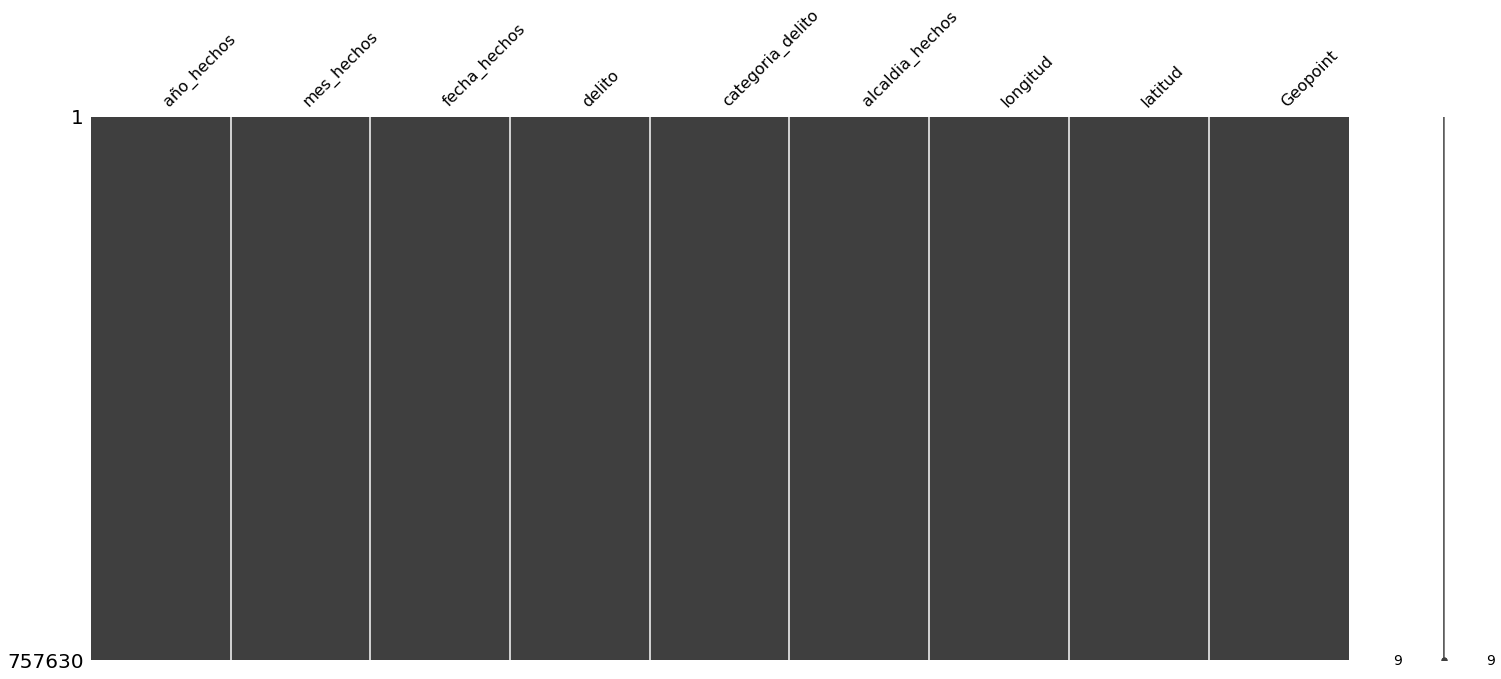

In [70]:
msno.matrix(df2) #.sample(350000)

In [71]:
df2.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,alcaldia_hechos,longitud,latitud,Geopoint
0,2016.0,Enero,2016-01-05 19:15:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,IZTAPALAPA,-99.039792,19.387093,"19.3870929998, -99.039792"
1,2015.0,Enero,2015-01-06 00:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,AZCAPOTZALCO,-99.182947,19.483439,"19.4834389998, -99.182947"
2,2016.0,Enero,2016-01-06 08:30:00,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,GUSTAVO A MADERO,-99.123658,19.487130,"19.4871299998, -99.123658"
3,2016.0,Enero,2016-01-05 21:50:00,QUEBRANTAMIENTO DE SELLOS,DELITO DE BAJO IMPACTO,BENITO JUAREZ,-99.159572,19.386404,"19.3864039998, -99.159572"
4,2016.0,Enero,2016-01-06 07:05:00,ROBO DE ACCESORIOS DE AUTO,DELITO DE BAJO IMPACTO,IZTACALCO,-99.136206,19.399977,"19.3999769998, -99.136206"


In [30]:
df2.to_csv('df2.csv')

In [72]:
df2.fecha_hechos = pd.to_datetime(df2.fecha_hechos, format='%Y-%m-%d %H:%M:%S')
#pd.to_datetime(df2.fecha_hechos, format='%Y-%m-%d %H:%M:%S')

In [73]:
df2.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,alcaldia_hechos,longitud,latitud,Geopoint
0,2016.0,Enero,2016-01-05 19:15:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,IZTAPALAPA,-99.039792,19.387093,"19.3870929998, -99.039792"
1,2015.0,Enero,2015-01-06 00:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,AZCAPOTZALCO,-99.182947,19.483439,"19.4834389998, -99.182947"
2,2016.0,Enero,2016-01-06 08:30:00,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,GUSTAVO A MADERO,-99.123658,19.487130,"19.4871299998, -99.123658"
3,2016.0,Enero,2016-01-05 21:50:00,QUEBRANTAMIENTO DE SELLOS,DELITO DE BAJO IMPACTO,BENITO JUAREZ,-99.159572,19.386404,"19.3864039998, -99.159572"
4,2016.0,Enero,2016-01-06 07:05:00,ROBO DE ACCESORIOS DE AUTO,DELITO DE BAJO IMPACTO,IZTACALCO,-99.136206,19.399977,"19.3999769998, -99.136206"


In [74]:
df2['Hora'] = df2['fecha_hechos'].apply(lambda x : x.hour)
df2['Mes'] = df2['fecha_hechos'].apply(lambda x : x.month)
df2['Año'] = df2['fecha_hechos'].apply(lambda x : x.year)

In [75]:
df2.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,alcaldia_hechos,longitud,latitud,Geopoint,Hora,Mes,Año
0,2016.0,Enero,2016-01-05 19:15:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,IZTAPALAPA,-99.039792,19.387093,"19.3870929998, -99.039792",19,1,2016
1,2015.0,Enero,2015-01-06 00:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,AZCAPOTZALCO,-99.182947,19.483439,"19.4834389998, -99.182947",0,1,2015
2,2016.0,Enero,2016-01-06 08:30:00,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,GUSTAVO A MADERO,-99.123658,19.487130,"19.4871299998, -99.123658",8,1,2016
3,2016.0,Enero,2016-01-05 21:50:00,QUEBRANTAMIENTO DE SELLOS,DELITO DE BAJO IMPACTO,BENITO JUAREZ,-99.159572,19.386404,"19.3864039998, -99.159572",21,1,2016
4,2016.0,Enero,2016-01-06 07:05:00,ROBO DE ACCESORIOS DE AUTO,DELITO DE BAJO IMPACTO,IZTACALCO,-99.136206,19.399977,"19.3999769998, -99.136206",7,1,2016


In [76]:
df2.index = pd.DatetimeIndex(df2.fecha_hechos)

In [77]:
df2.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,alcaldia_hechos,longitud,latitud,Geopoint,Hora,Mes,Año
fecha_hechos,,,,,,,,,,,,
2016-01-05 19:15:00,2016.0,Enero,2016-01-05 19:15:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,IZTAPALAPA,-99.039792,19.387093,"19.3870929998, -99.039792",19,1,2016
2015-01-06 00:00:00,2015.0,Enero,2015-01-06 00:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,AZCAPOTZALCO,-99.182947,19.483439,"19.4834389998, -99.182947",0,1,2015
2016-01-06 08:30:00,2016.0,Enero,2016-01-06 08:30:00,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,GUSTAVO A MADERO,-99.123658,19.487130,"19.4871299998, -99.123658",8,1,2016
2016-01-05 21:50:00,2016.0,Enero,2016-01-05 21:50:00,QUEBRANTAMIENTO DE SELLOS,DELITO DE BAJO IMPACTO,BENITO JUAREZ,-99.159572,19.386404,"19.3864039998, -99.159572",21,1,2016
2016-01-06 07:05:00,2016.0,Enero,2016-01-06 07:05:00,ROBO DE ACCESORIOS DE AUTO,DELITO DE BAJO IMPACTO,IZTACALCO,-99.136206,19.399977,"19.3999769998, -99.136206",7,1,2016


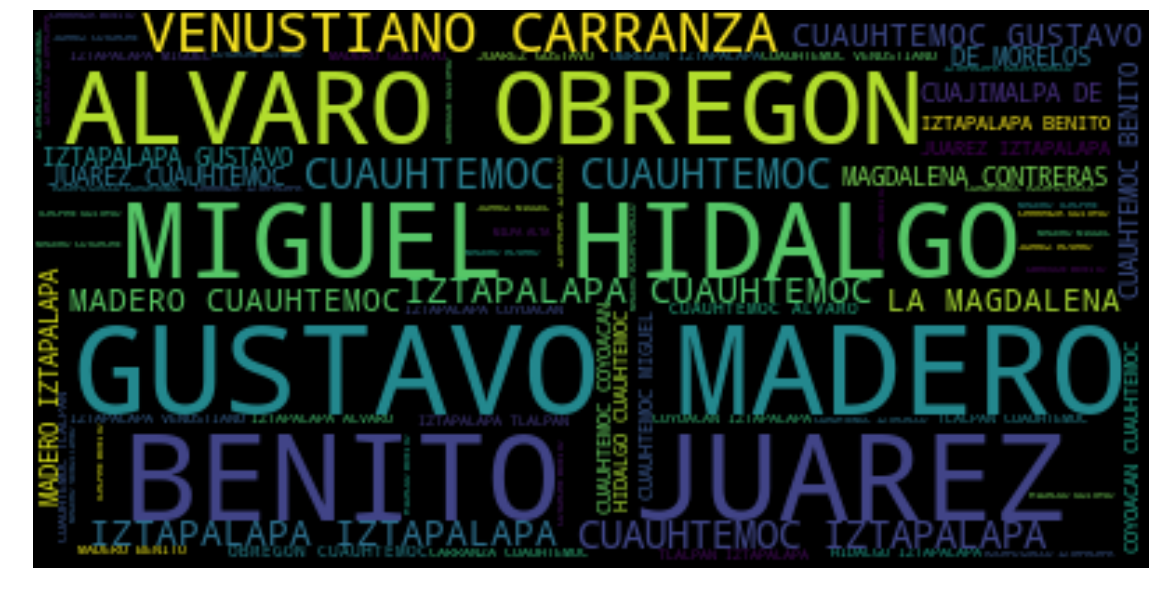

In [78]:
crime_types_code = " ".join(crime for crime in df2["alcaldia_hechos"])

crime_code_wordcloud = WordCloud().generate(crime_types_code)

plt.figure(figsize=[20,20])
plt.imshow(crime_code_wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [79]:
df2 = df2[df2['Año'] >= 2016]

In [80]:
df2.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,alcaldia_hechos,longitud,latitud,Geopoint,Hora,Mes,Año
fecha_hechos,,,,,,,,,,,,
2016-01-05 19:15:00,2016.0,Enero,2016-01-05 19:15:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,IZTAPALAPA,-99.039792,19.387093,"19.3870929998, -99.039792",19,1,2016
2016-01-06 08:30:00,2016.0,Enero,2016-01-06 08:30:00,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,GUSTAVO A MADERO,-99.123658,19.487130,"19.4871299998, -99.123658",8,1,2016
2016-01-05 21:50:00,2016.0,Enero,2016-01-05 21:50:00,QUEBRANTAMIENTO DE SELLOS,DELITO DE BAJO IMPACTO,BENITO JUAREZ,-99.159572,19.386404,"19.3864039998, -99.159572",21,1,2016
2016-01-06 07:05:00,2016.0,Enero,2016-01-06 07:05:00,ROBO DE ACCESORIOS DE AUTO,DELITO DE BAJO IMPACTO,IZTACALCO,-99.136206,19.399977,"19.3999769998, -99.136206",7,1,2016
2016-01-06 05:30:00,2016.0,Enero,2016-01-06 05:30:00,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,DELITO DE BAJO IMPACTO,IZTACALCO,-99.136049,19.400979,"19.4009789998, -99.136049",5,1,2016


In [132]:
crime_count = pd.DataFrame(df2.groupby('categoria_delito').size().sort_values(ascending=False).rename('counts').reset_index())
crime_count

,categoria_delito,counts
0,DELITO DE BAJO IMPACTO,579533
1,HECHO NO DELICTIVO,43884
2,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,39805
3,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,31811
4,ROBO A NEGOCIO CON VIOLENCIA,10934
5,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,6926
6,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,5205
7,HOMICIDIO DOLOSO,3689
8,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,3000
9,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN ...,2711


In [133]:
crime_count2 = pd.DataFrame(df2.groupby('delito').size().sort_values(ascending=False).rename('counts').reset_index())
crime_count2

,delito,counts
0,VIOLENCIA FAMILIAR,64922
1,ROBO DE OBJETOS,49720
2,ROBO A NEGOCIO SIN VIOLENCIA,49548
3,DENUNCIA DE HECHOS,37200
4,FRAUDE,36457
5,AMENAZAS,35335
6,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,27744
7,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,25765
8,ROBO DE ACCESORIOS DE AUTO,24565
9,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,23005


In [135]:
alcaldia_count = pd.DataFrame(df2.groupby('alcaldia_hechos').size().sort_values(ascending=False).rename('counts').reset_index())
alcaldia_count

,alcaldia_hechos,counts
0,CUAUHTEMOC,116811
1,IZTAPALAPA,109678
2,GUSTAVO A MADERO,73319
3,BENITO JUAREZ,65201
4,COYOACAN,50099
5,MIGUEL HIDALGO,49407
6,ALVARO OBREGON,48629
7,TLALPAN,42649
8,VENUSTIANO CARRANZA,42365
9,AZCAPOTZALCO,37177


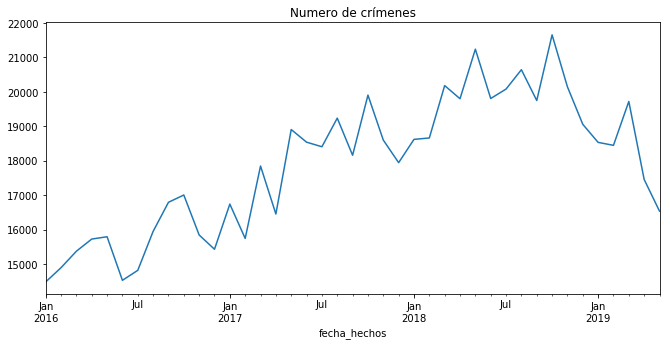

In [82]:
# Resampling the time series data based on months 
# we apply it on stock close price 
# 'M' indicates month 
plt.figure(figsize=(11,5))

df2.resample('M').size().plot(legend=False)
plt.title('Numero de crímenes por mes (2016-2019)')
plt.title('Meses')
plt.title('Numero de crímenes')
plt.show()

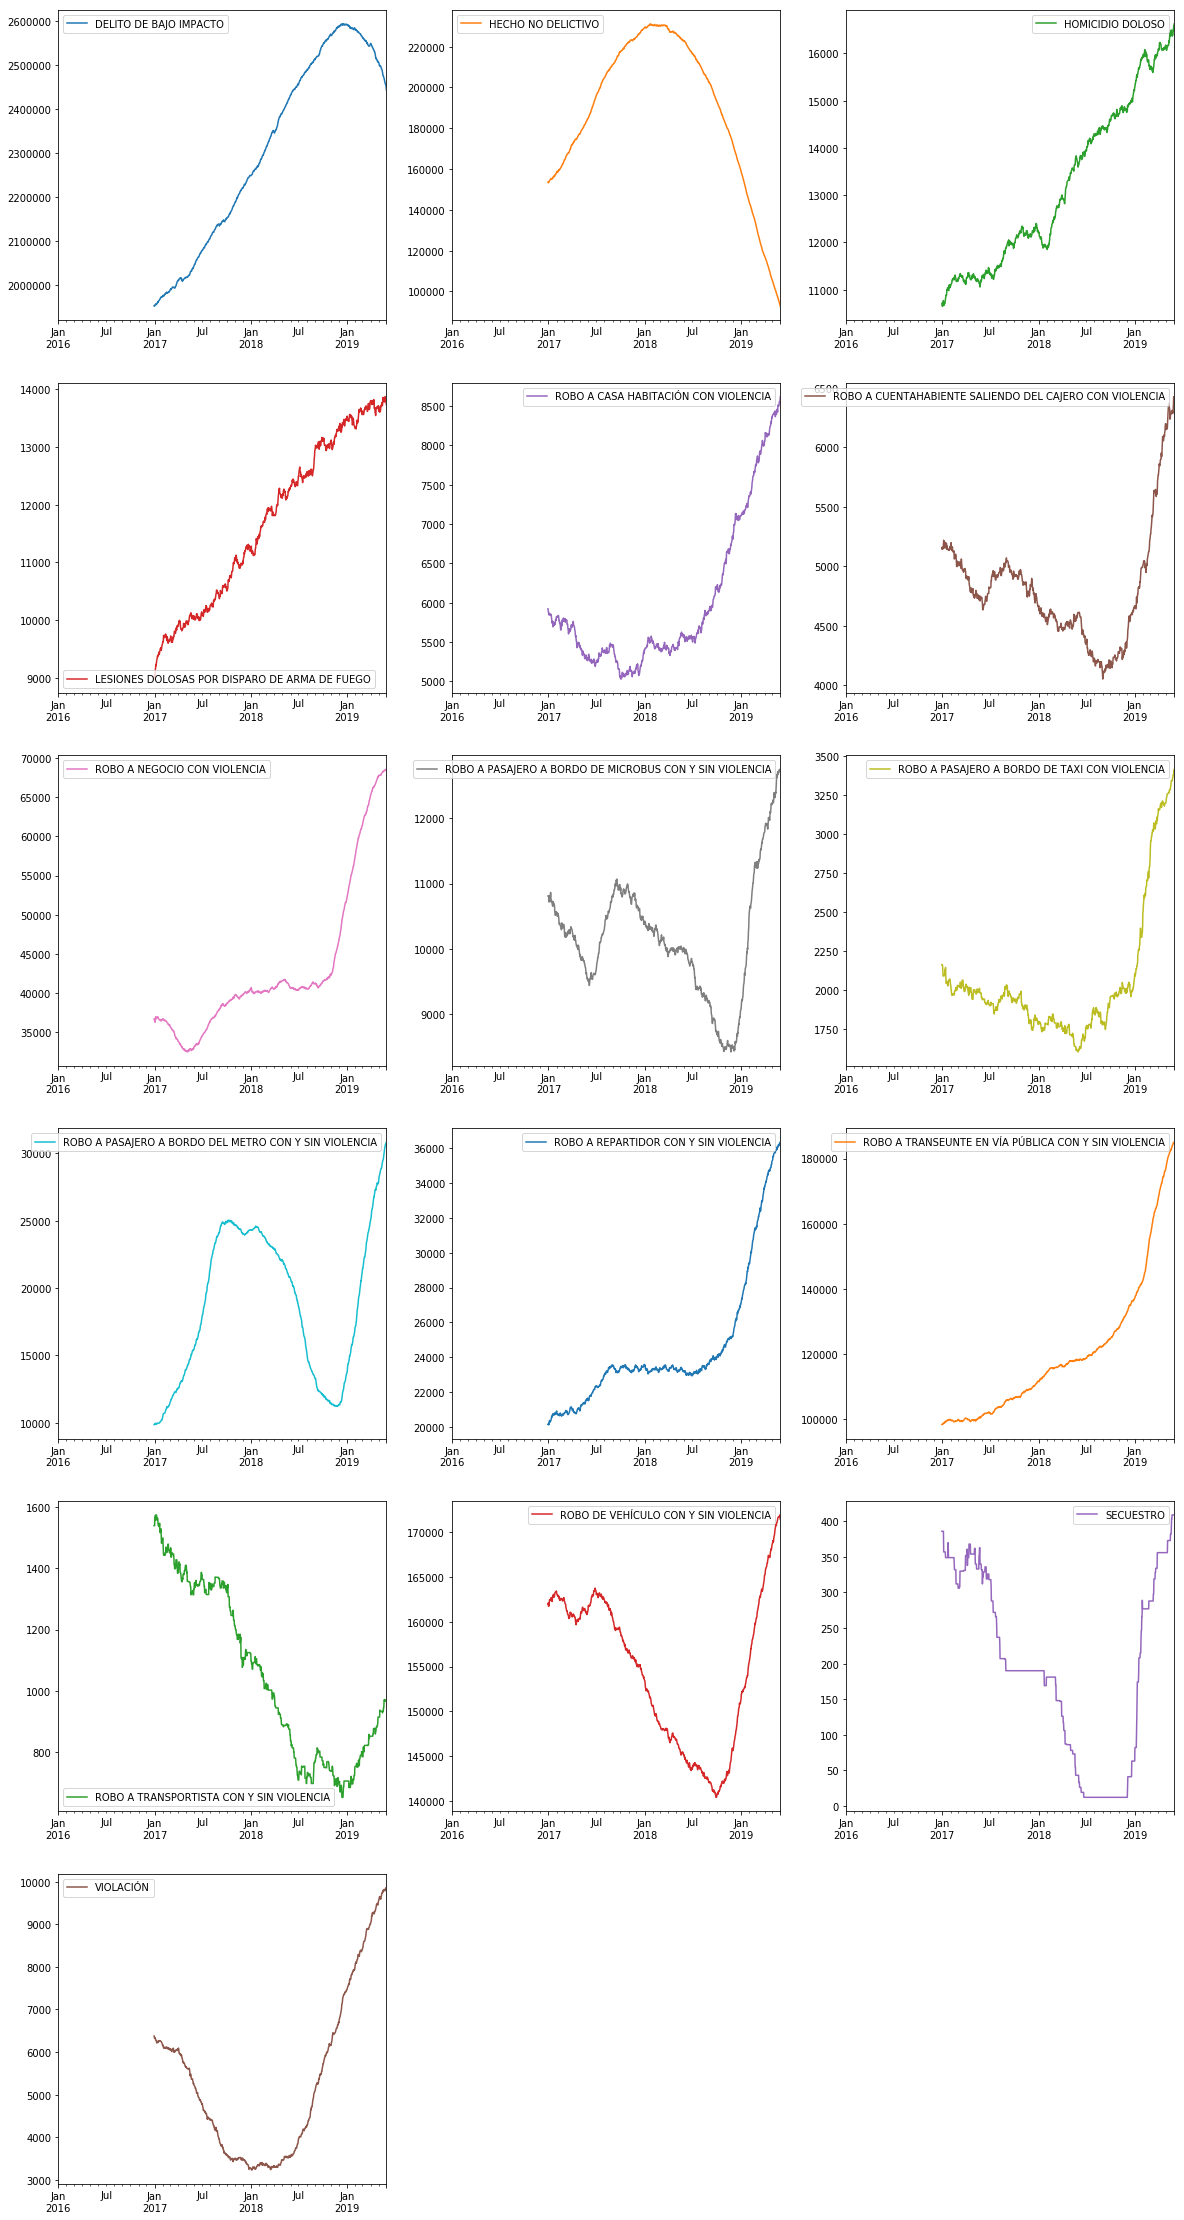

In [105]:
crimes_count_date = df2.pivot_table('Hora',aggfunc=np.size, columns='categoria_delito',
                                  index=df2.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plot = crimes_count_date.rolling(365).sum().plot(figsize=(20, 40), subplots=True,
                                                layout=(-1,3),sharex=False, sharey=False)

In [93]:
crimes_count_date.head()

categoria_delito,DELITO DE BAJO IMPACTO,HECHO NO DELICTIVO,HOMICIDIO DOLOSO,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,ROBO A CASA HABITACIÓN CON VIOLENCIA,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA,ROBO A NEGOCIO CON VIOLENCIA,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA,ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SECUESTRO,VIOLACIÓN
2016-01-01,389,55,4,6,3,0,9,0,0,0,0,5,0,11,0,2
2016-01-02,286,27,3,0,1,1,10,0,0,2,3,17,0,32,0,2
2016-01-03,283,20,2,1,2,0,5,3,1,0,1,17,0,30,0,0
2016-01-04,420,35,0,1,0,2,20,5,2,2,8,18,0,49,0,3
2016-01-05,400,28,1,1,1,2,8,2,2,5,7,19,0,35,0,1


In [265]:
crimes_by_time = df2.copy()

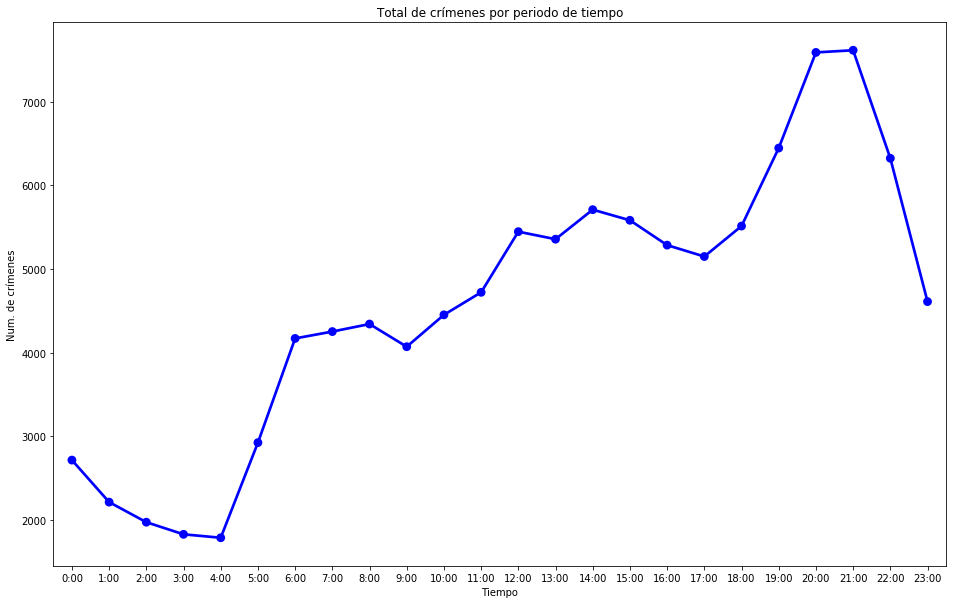

In [266]:
primary_types = ['HOMICIDIO DOLOSO', 'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO', 'ROBO A CASA HABITACIÓN CON VIOLENCIA', 
                 'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA', 'ROBO A NEGOCIO CON VIOLENCIA', 'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA', 
                 'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA', 'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA', 'ROBO A REPARTIDOR CON Y SIN VIOLENCIA',
                 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA', 'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA', 'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA','SECUESTRO', 'VIOLACIÓN']
#'DELITO DE BAJO IMPACTO','HECHO NO DELICTIVO'

crimes_by_time = crimes_by_time[crimes_by_time['categoria_delito'].isin(primary_types)] #crimes_by_time['categoria_delito']

crimes_by_time = crimes_by_time.groupby('Hora').size().reset_index(name ='Num. de crímenes')
crimes_by_time['Horas'] = crimes_by_time['Hora'].apply(lambda x: str(x)+':00')

fig = plt.figure(figsize=(16,10))
sns.pointplot(data=crimes_by_time, x="Horas", y="Num. de crímenes", color="blue")

plt.xlabel('Tiempo')
plt.ylabel('Num. de crímenes')
plt.title('Total de crímenes por periodo de tiempo')
plt.show()

In [119]:
crimes_by_time.head(24)

,Hora,Num. de crímenes,Horas
0,0,2716,0:00
1,1,2214,1:00
2,2,1974,2:00
3,3,1829,3:00
4,4,1788,4:00
5,5,2925,5:00
6,6,4170,6:00
7,7,4252,7:00
8,8,4342,8:00
9,9,4071,9:00


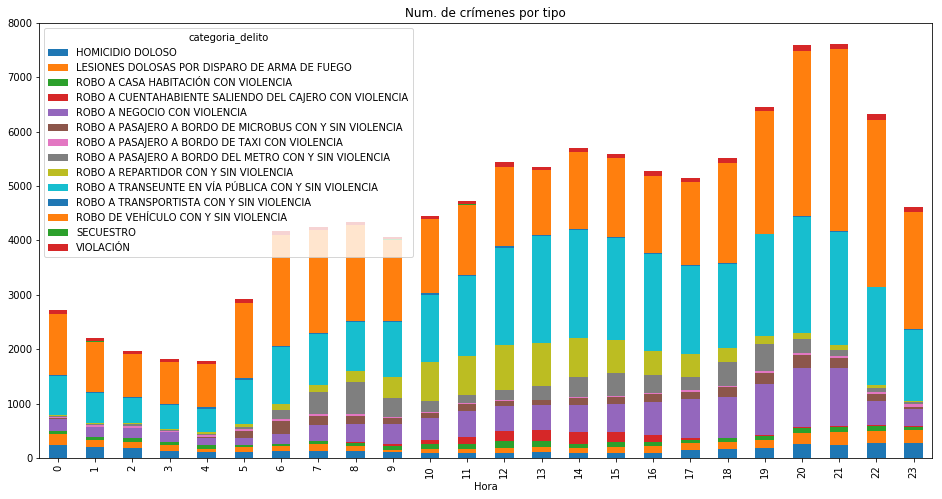

In [120]:
crimes_by_type = df2.copy()
crimes_by_type = crimes_by_type[crimes_by_type['categoria_delito'].isin(primary_types)] #crimes_by_time['categoria_delito']

crimes_by_type = crimes_by_type.groupby(['Hora','categoria_delito']).size().reset_index(name ='Num. de crímenes')
crimes_by_type['Horas'] = crimes_by_type['Hora'].apply(lambda x: str(x)+':00')

crimes_by_type_pivot = pd.pivot_table(crimes_by_type, index=['Hora'], columns=['categoria_delito'],
                                     values='Num. de crímenes', aggfunc=np.sum)
crimes_by_type_pivot.plot(kind='bar', stacked=True, figsize=(16,8),
                         title='Num. de crímenes por tipo')

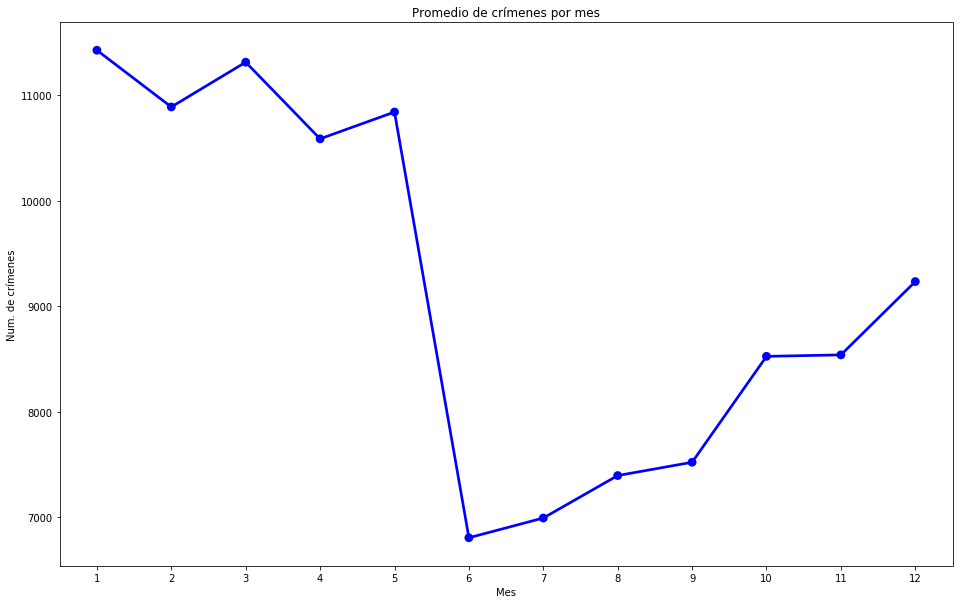

In [127]:
crimes_by_month = df2.copy()
crimes_by_month = crimes_by_month[crimes_by_month['categoria_delito'].isin(primary_types)] #crimes_by_time['categoria_delito']

crimes_by_month = crimes_by_month.groupby('Mes').size().reset_index(name ='Num. de crímenes')
crimes_by_month['Mes (Promedio)'] = crimes_by_month['Num. de crímenes']#.apply(lambda x: x/4)

fig = plt.figure(figsize=(16,10))
sns.pointplot(data=crimes_by_month, x="Mes", y="Mes (Promedio)", color="blue")

plt.xlabel('Mes')
plt.ylabel('Num. de crímenes')
plt.title('Promedio de crímenes por mes')
plt.show()

In [128]:
crimes_by_month.head(12)

,Mes,Num. de crímenes,Mes (Promedio)
0,1,11425,11425
1,2,10888,10888
2,3,11312,11312
3,4,10586,10586
4,5,10840,10840
5,6,6808,6808
6,7,6995,6995
7,8,7397,7397
8,9,7523,7523
9,10,8526,8526


In [145]:
df2.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,alcaldia_hechos,longitud,latitud,Geopoint,Hora,Mes,Año
fecha_hechos,,,,,,,,,,,,
2016-01-05 19:15:00,2016.0,Enero,2016-01-05 19:15:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,IZTAPALAPA,-99.039792,19.387093,"19.3870929998, -99.039792",19,1,2016
2016-01-06 08:30:00,2016.0,Enero,2016-01-06 08:30:00,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,GUSTAVO A MADERO,-99.123658,19.487130,"19.4871299998, -99.123658",8,1,2016
2016-01-05 21:50:00,2016.0,Enero,2016-01-05 21:50:00,QUEBRANTAMIENTO DE SELLOS,DELITO DE BAJO IMPACTO,BENITO JUAREZ,-99.159572,19.386404,"19.3864039998, -99.159572",21,1,2016
2016-01-06 07:05:00,2016.0,Enero,2016-01-06 07:05:00,ROBO DE ACCESORIOS DE AUTO,DELITO DE BAJO IMPACTO,IZTACALCO,-99.136206,19.399977,"19.3999769998, -99.136206",7,1,2016
2016-01-06 05:30:00,2016.0,Enero,2016-01-06 05:30:00,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,DELITO DE BAJO IMPACTO,IZTACALCO,-99.136049,19.400979,"19.4009789998, -99.136049",5,1,2016


In [147]:
le = preprocessing.LabelEncoder()
categoria_delito_cat = le.fit_transform(df2.categoria_delito)
alcaldia_hechos_cat = le.fit_transform(df2.alcaldia_hechos)
Mes_cat   = le.fit_transform(df2.Mes)
Hora_cat = le.fit_transform(df2.Hora)

In [149]:
df3 = df2

In [150]:
#initialize the encoded categorical columns
df3['categoria_delito_cat'] = categoria_delito_cat
df3['alcaldia_hechos_cat'] = alcaldia_hechos_cat
df3['Mes_cat'] = Mes_cat
df3['Hora_cat'] = Hora_cat

In [152]:
df3.head(50)

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,alcaldia_hechos,longitud,latitud,Geopoint,Hora,Mes,Año,categoria_delito_cat,alcaldia_hechos_cat,Mes_cat,Hora_cat
fecha_hechos,,,,,,,,,,,,,,,,
2016-01-05 19:15:00,2016.0,Enero,2016-01-05 19:15:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,IZTAPALAPA,-99.039792,19.387093,"19.3870929998, -99.039792",19,1,2016,0,10,0,19
2016-01-06 08:30:00,2016.0,Enero,2016-01-06 08:30:00,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,GUSTAVO A MADERO,-99.123658,19.487130,"19.4871299998, -99.123658",8,1,2016,0,8,0,8
2016-01-05 21:50:00,2016.0,Enero,2016-01-05 21:50:00,QUEBRANTAMIENTO DE SELLOS,DELITO DE BAJO IMPACTO,BENITO JUAREZ,-99.159572,19.386404,"19.3864039998, -99.159572",21,1,2016,0,3,0,21
2016-01-06 07:05:00,2016.0,Enero,2016-01-06 07:05:00,ROBO DE ACCESORIOS DE AUTO,DELITO DE BAJO IMPACTO,IZTACALCO,-99.136206,19.399977,"19.3999769998, -99.136206",7,1,2016,0,9,0,7
2016-01-06 05:30:00,2016.0,Enero,2016-01-06 05:30:00,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,DELITO DE BAJO IMPACTO,IZTACALCO,-99.136049,19.400979,"19.4009789998, -99.136049",5,1,2016,0,9,0,5
2016-01-05 22:40:00,2016.0,Enero,2016-01-05 22:40:00,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,IZTACALCO,-99.124976,19.382372,"19.3823722998, -99.1249756",22,1,2016,0,9,0,22
2016-01-05 18:00:00,2016.0,Enero,2016-01-05 18:00:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,IZTACALCO,-99.108578,19.382423,"19.3824229998, -99.108578",18,1,2016,0,9,0,18
2016-01-05 16:00:00,2016.0,Enero,2016-01-05 16:00:00,ENCUBRIMIENTO,DELITO DE BAJO IMPACTO,IZTAPALAPA,-99.045747,19.390440,"19.3904399998, -99.045747",16,1,2016,0,10,0,16
2016-01-04 18:40:00,2016.0,Enero,2016-01-04 18:40:00,ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO ...,DELITO DE BAJO IMPACTO,TLAHUAC,-99.039719,19.314581,"19.3145809998, -99.039719",18,1,2016,0,16,0,18


In [161]:
#type(df3.longitud)
#df[['A', 'C']].apply(pd.to_numeric) 
#pd.to_numeric(df3.longitud)
#df3.index = df2.index
df3['longitud'] = df3['longitud'].apply(pd.to_numeric)
df3['latitud'] = df3['latitud'].apply(pd.to_numeric)

In [248]:
features = df2.drop('delito', axis = 1)
features = features.drop('Año', axis = 1)
features = features.drop('alcaldia_hechos', axis = 1)
features = features.drop('mes_hechos', axis = 1)
features = features.drop('año_hechos', axis = 1)
features = features.drop(['Geopoint','categoria_delito','fecha_hechos','Hora','Mes','categoria_delito_cat','Mes_cat','alcaldia_hechos_cat'], axis = 1)
target = df2['categoria_delito']

In [249]:
features.head()

,longitud,latitud,Hora_cat
fecha_hechos,,,
2016-01-05 19:15:00,-99.039792,19.387093,19
2016-01-06 08:30:00,-99.123658,19.487130,8
2016-01-05 21:50:00,-99.159572,19.386404,21
2016-01-06 07:05:00,-99.136206,19.399977,7
2016-01-06 05:30:00,-99.136049,19.400979,5


In [263]:
target.head(500)

fecha_hechos
2016-01-05 19:15:00                               DELITO DE BAJO IMPACTO
2016-01-06 08:30:00                               DELITO DE BAJO IMPACTO
2016-01-05 21:50:00                               DELITO DE BAJO IMPACTO
2016-01-06 07:05:00                               DELITO DE BAJO IMPACTO
2016-01-06 05:30:00                               DELITO DE BAJO IMPACTO
2016-01-05 22:40:00                               DELITO DE BAJO IMPACTO
2016-01-05 18:00:00                               DELITO DE BAJO IMPACTO
2016-01-05 16:00:00                               DELITO DE BAJO IMPACTO
2016-01-04 18:40:00                               DELITO DE BAJO IMPACTO
2016-01-04 10:00:00                               DELITO DE BAJO IMPACTO
2016-01-05 17:00:00                                   HECHO NO DELICTIVO
2016-01-05 16:40:00                               DELITO DE BAJO IMPACTO
2016-01-02 20:30:00                         ROBO A NEGOCIO CON VIOLENCIA
2016-01-04 11:30:00                   

In [251]:
gnb = GaussianNB()
scores = cross_val_score(gnb, features, target)
scores.mean()

C:\Users\Oscar.Oscar-PC.000\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.7901010376334563

In [252]:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, test_size = 0.33, random_state = 10)
clf = GaussianNB()
clf.fit(features_train, target_train)
target_pred = clf.predict(features_test)

In [253]:
accuracy_score(target_test, target_pred, normalize = True)

0.7904756396326424

In [254]:
target_pred

array(['DELITO DE BAJO IMPACTO', 'DELITO DE BAJO IMPACTO',
       'DELITO DE BAJO IMPACTO', ..., 'DELITO DE BAJO IMPACTO',
       'DELITO DE BAJO IMPACTO', 'DELITO DE BAJO IMPACTO'], dtype='<U55')

In [255]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
ada = AdaBoostClassifier() ##Aqui pondremos nuestro algoritmo de equipo para el ejemplo
model = ada.fit(X_train, y_train) #entrenar 
prediccion = model.predict(X_test)
prediccion

array(['DELITO DE BAJO IMPACTO', 'DELITO DE BAJO IMPACTO',
       'DELITO DE BAJO IMPACTO', ..., 'DELITO DE BAJO IMPACTO',
       'DELITO DE BAJO IMPACTO', 'DELITO DE BAJO IMPACTO'], dtype=object)

In [258]:
metrics.accuracy_score(y_test, prediccion)

0.7900326518926509

In [262]:
#X=[[-99.164280,19.417632,7]] 
#X=[[-99.171329,19.526127,13]]
X=[[-99.121141,19.436160,18]]
prediccion = model.predict(X)
prediccion

array(['DELITO DE BAJO IMPACTO'], dtype=object)